## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [39]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

In [40]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [42]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [4]:
from alpaca_trade_api.rest import REST, TimeFrame

tickers = ['KO', 'MSFT']

ticker_name = 'MSFT'
df_ticker = api.get_bars(ticker_name, TimeFrame.Day, "2020-03-08", "2022-03-08", adjustment='raw').df
df_ticker.index = df_ticker.index.date
df_ticker=df_ticker[['close']]
df_ticker

,close
2020-03-09,150.62
2020-03-10,160.92
2020-03-11,153.63
2020-03-12,139.06
2020-03-13,158.83
...,...
2022-03-02,300.19
2022-03-03,295.92
2022-03-04,289.86
2022-03-07,278.91


In [5]:
micolumns = pd.MultiIndex.from_tuples(
    [(ticker_name, "close")]
)
df_ticker.columns = micolumns
df_ticker

,MSFT
,close
2020-03-09,150.62
2020-03-10,160.92
2020-03-11,153.63
2020-03-12,139.06
2020-03-13,158.83
...,...
2022-03-02,300.19
2022-03-03,295.92
2022-03-04,289.86


In [6]:
pct_changes = df_ticker.pct_change()
pct_changes.dropna(inplace=True)
pct_changes.index = pd.to_datetime(pct_changes.index)
pct_changes

,MSFT
,close
2020-03-10,0.068384
2020-03-11,-0.045302
2020-03-12,-0.094838
2020-03-13,0.142169
2020-03-16,-0.147390
...,...
2022-03-02,0.017766
2022-03-03,-0.014224
2022-03-04,-0.020479


<AxesSubplot:>

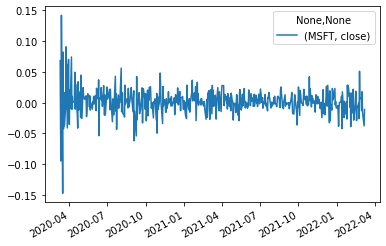

In [7]:
pct_changes.plot()

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

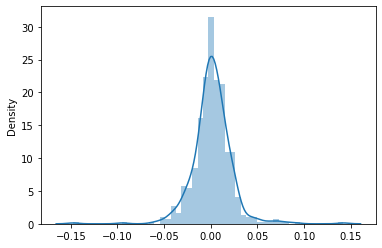

In [8]:
import seaborn as sns
sns.distplot(pct_changes)

In [9]:
initial_price = df_ticker.iloc[-1].values[0]
initial_price

275.85

In [10]:
possible_changes = list(pct_changes['MSFT']['close'].values)
possible_changes[0:10]

[0.06838401274731098,
 -0.0453020134228187,
 -0.09483824773807192,
 0.14216884797928953,
 -0.1473902915066425,
 0.08233643479545116,
 -0.04209592686088548,
 0.016452991452991395,
 -0.03755868544600949,
 -0.009974517655624404]

In [11]:
from random import sample
current_pct_change = sample(possible_changes,1)[0]
current_pct_change

-0.024360815857512264

In [13]:
current_price = initial_price * ( 1+ current_pct_change)
current_price

269.13006894570526

In [14]:
current_pct_change = sample(possible_changes,1)[0]
current_pct_change

0.0111544292830843

In [15]:
current_price = current_price * (1+ current_pct_change)
current_price

272.1320612677117

In [16]:
num_days = 252

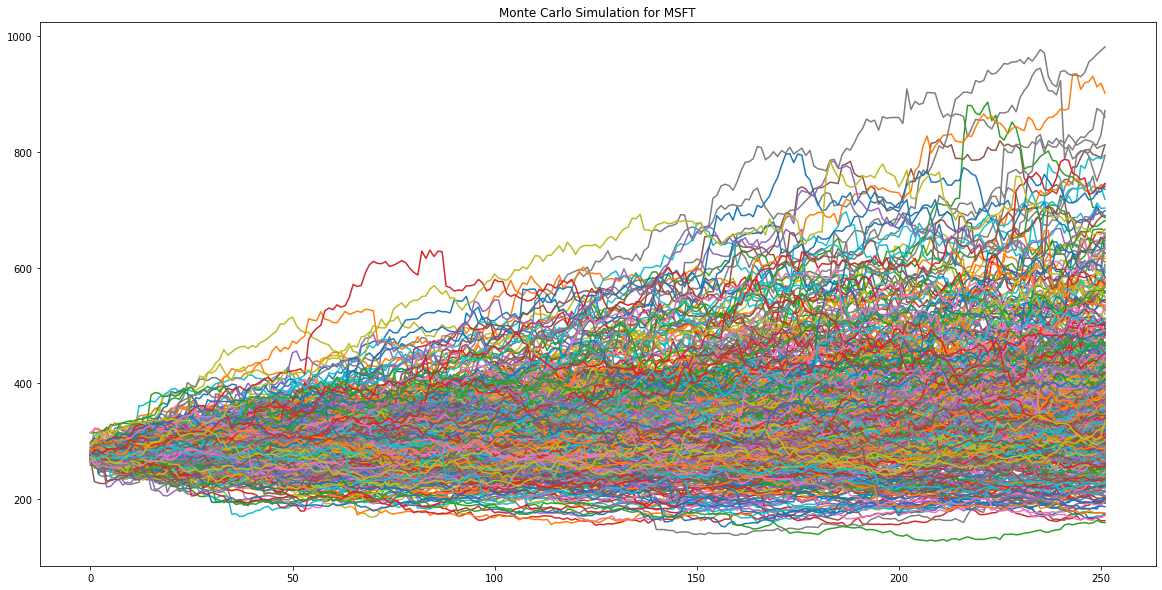

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

realizations = []
for i in range(0, 500): 
    
    current_price = initial_price 
    current_price_history = []
    for i in range(num_days): 
        current_pct_change = sample(possible_changes,1)[0]
        current_price = current_price * (1+ current_pct_change)
        current_price_history.append(current_price)
     

    plt.plot(current_price_history)
    plt.title("Monte Carlo Simulation for MSFT")
    
    realizations.append(current_price_history)

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

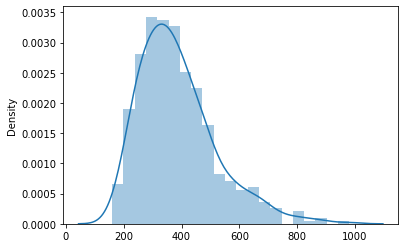

In [18]:
closing_prices_as_of_last_day = [x[-1] for x in realizations]
closing_prices_as_of_last_day

sns.distplot(closing_prices_as_of_last_day)

In [19]:
expected_return = (np.mean(closing_prices_as_of_last_day) - initial_price)/initial_price
expected_return

0.39982437355772454

In [20]:
np.mean(closing_prices_as_of_last_day)

386.14155344589835

In [21]:
upper_bound

NameError: name 'upper_bound' is not defined

In [22]:
def get_data(ticker_name, start_date, end_date):   
    df_ticker = api.get_bars(ticker_name, TimeFrame.Day, start_date, end_date, adjustment='raw').df
    df_ticker.index = df_ticker.index.date
    df_ticker=df_ticker[['close']]
    
    return df_ticker

In [23]:
msft = get_data('MSFT', '2021-03-01', '2022-03-01')
msft


,close
2021-03-01,236.94
2021-03-02,233.87
2021-03-03,227.56
2021-03-04,226.73
2021-03-05,231.60
...,...
2022-02-23,280.27
2022-02-24,294.59
2022-02-25,297.31
2022-02-28,298.79


In [24]:
aapl = get_data('AAPL', '2021-03-01', '2022-03-01')
aapl

,close
2021-03-01,127.79
2021-03-02,125.12
2021-03-03,122.06
2021-03-04,120.13
2021-03-05,121.42
...,...
2022-02-23,160.07
2022-02-24,162.74
2022-02-25,164.85
2022-02-28,165.12


In [25]:
msft['mixed'] = aapl['close'] + msft['close']
msft['mixed']

msft

,close,mixed
2021-03-01,236.94,364.73
2021-03-02,233.87,358.99
2021-03-03,227.56,349.62
2021-03-04,226.73,346.86
2021-03-05,231.60,353.02
...,...,...
2022-02-23,280.27,440.34
2022-02-24,294.59,457.33
2022-02-25,297.31,462.16
2022-02-28,298.79,463.91


In [26]:
df = get_data('MSFT', '2021-03-01', '2022-03-01')
df

,close
2021-03-01,236.94
2021-03-02,233.87
2021-03-03,227.56
2021-03-04,226.73
2021-03-05,231.60
...,...
2022-02-23,280.27
2022-02-24,294.59
2022-02-25,297.31
2022-02-28,298.79


In [27]:
from random import sample

def plot_MC(ticker, start_date, end_date, num_days=10): 
    df = get_data(ticker, start_date, end_date)
    initial_price = df.iloc[-1].values[0]
    
    pct_changes = df.pct_change()
    pct_changes.dropna(inplace=True)
    pct_changes.index = pd.to_datetime(pct_changes.index)
    
    possible_changes = list(pct_changes['close'].values)
    

    plt.figure(figsize=(20,10))

    realizations = []
    for i in range(0, 500): 

        current_price = initial_price 
        current_price_history = []
        for i in range(num_days): 
            current_pct_change = sample(possible_changes,1)[0]
            current_price = current_price * (1+ current_pct_change)
            current_price_history.append(current_price)


        plt.plot(current_price_history)
        plt.title(f"Monte Carlo Simulation for {ticker}")

        realizations.append(current_price_history)
        
    plt.show()
    
    closing_prices_as_of_last_day = [x[-1] for x in realizations]
    expected_return = (np.mean(closing_prices_as_of_last_day) - initial_price)/initial_price
    low_bound =  np.mean(closing_prices_as_of_last_day)  - 2*np.std(closing_prices_as_of_last_day)
    upper_bound =  np.mean(closing_prices_as_of_last_day)  + 2*np.std(closing_prices_as_of_last_day)

    print(f"The starting closing price at the end of this period was {initial_price}")
    print(f"The expected return on {ticker} is {expected_return} and the closing price will be between \
            {low_bound} and {upper_bound} with 95% confidence in the next {num_days} trading days")
    
    low_bound =  np.mean(closing_prices_as_of_last_day)  - 1*np.std(closing_prices_as_of_last_day)
    upper_bound =  np.mean(closing_prices_as_of_last_day)  + 1*np.std(closing_prices_as_of_last_day)
    
    print(f"The starting closing price at the end of this period was {initial_price}")
    print(f"The expected return on {ticker} is {expected_return} and the closing price will be between \
            {low_bound} and {upper_bound} with 67% confidence in the next {num_days} trading days")


    

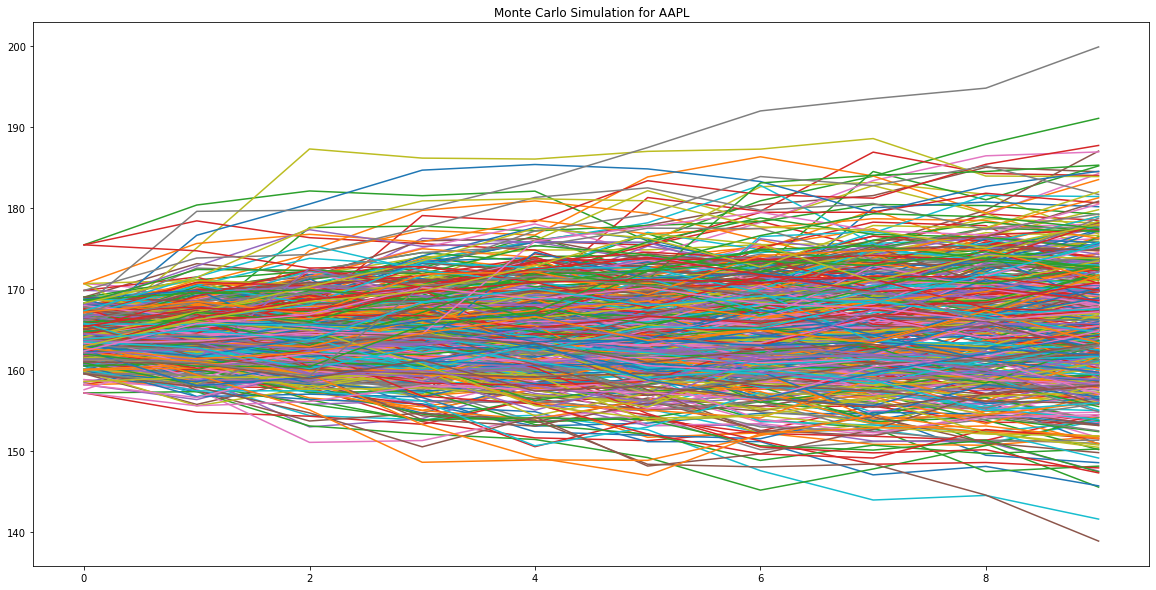

The starting closing price at the end of this period was 163.98
The expected return on AAPL is 0.011687813347405764 and the closing price will be between             149.045595174713 and 182.7475400907022 with 95% confidence in the next 10 trading days
The starting closing price at the end of this period was 163.98
The expected return on AAPL is 0.011687813347405764 and the closing price will be between             157.4710814037103 and 174.3220538617049 with 67% confidence in the next 10 trading days


In [28]:
plot_MC('AAPL', '2021-03-01', '2022-03-20')

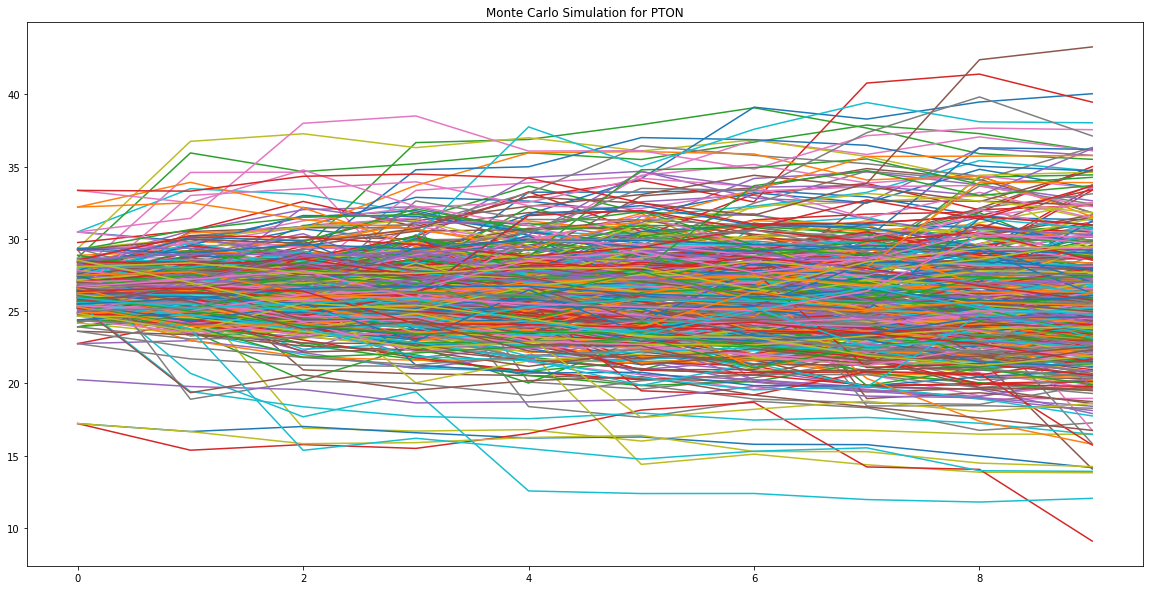

The starting closing price at the end of this period was 26.62
The expected return on PTON is -0.03638251754946264 and the closing price will be between             16.791653897428723 and 34.51134086823789 with 95% confidence in the next 10 trading days
The starting closing price at the end of this period was 26.62
The expected return on PTON is -0.03638251754946264 and the closing price will be between             21.221575640131014 and 30.081419125535596 with 67% confidence in the next 10 trading days


In [29]:
plot_MC('PTON', '2021-03-01', '2022-03-20')

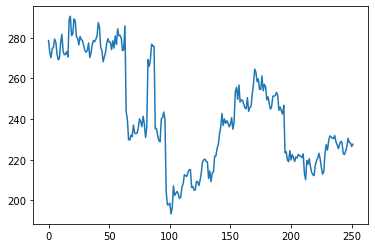

In [30]:
plt.plot(current_price_history)

In [31]:
df_ticker['MSFT']['close']

2020-03-09    150.62
2020-03-10    160.92
2020-03-11    153.63
2020-03-12    139.06
2020-03-13    158.83
               ...  
2022-03-02    300.19
2022-03-03    295.92
2022-03-04    289.86
2022-03-07    278.91
2022-03-08    275.85
Name: close, Length: 505, dtype: float64

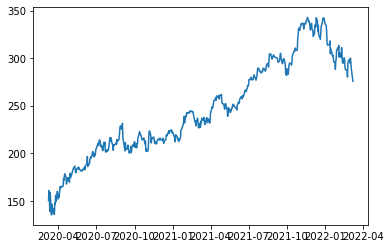

In [32]:
plt.plot(df_ticker['MSFT']['close'])

In [33]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.400772  0.643598
  2  0.173717  0.650971
b 1  0.875121  0.618900
  2  0.805143  0.331802

In [34]:
micolumns = pd.MultiIndex.from_tuples(
    [("MSFT", "close")], names=["lvl0", "lvl1"]
)
micolumns

MultiIndex([('MSFT', 'close')],
           names=['lvl0', 'lvl1'])

In [35]:
miindex

NameError: name 'miindex' is not defined

In [ ]:
micolumns = pd.MultiIndex.from_tuples(
    [("a", "foo"), ("a", "bar"), ("b", "foo"), ("b", "bah")], names=["lvl0", "lvl1"]
)
micolumns

In [ ]:
# hierarchical indices and columns


# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

In [ ]:
def mklbl(prefix, n):
    return ["%s%s" % (prefix, i) for i in range(n)]


miindex = pd.MultiIndex.from_product(
    [mklbl("A", 1), mklbl("B", 1), mklbl("C", 4), mklbl("D", 2)]
)


micolumns = pd.MultiIndex.from_tuples(
    [("a", "foo"), ("a", "bar"), ("b", "foo"), ("b", "bah")], names=["lvl0", "lvl1"]
)


dfmi = (
    pd.DataFrame(
        np.arange(len(miindex) * len(micolumns)).reshape(
            (len(miindex), len(micolumns))
        ),
        index=miindex,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)
dfmi


In [ ]:
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df

### The MCForecastTools Library at a Glance

In [36]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [37]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

class MCSimulation:
    """
    A Python class for runnning Monte Carlo simulation on portfolio price data. 
    
    ...
    
    Attributes
    ----------
    portfolio_data : pandas.DataFrame
        portfolio dataframe
    weights: list(float)
        portfolio investment breakdown
    nSim: int
        number of samples in simulation
    nTrading: int
        number of trading days to simulate
    simulated_return : pandas.DataFrame
        Simulated data from Monte Carlo
    confidence_interval : pandas.Series
        the 95% confidence intervals for simulated final cumulative returns
        
    """
    
    def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
        """
        Constructs all the necessary attributes for the MCSimulation object.

        Parameters
        ----------
        portfolio_data: pandas.DataFrame
            DataFrame containing stock price information from Alpaca API
        weights: list(float)
            A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
        num_simulation: int
            Number of simulation samples. DEFAULT: 1000 simulation samples
        num_trading_days: int
            Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)
        """
        
        # Check to make sure that all attributes are set
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")
            
        # Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")
        
        # Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data['close'].pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    
        
        # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """
        
        # Get closing prices of each stock
        last_prices = self.portfolio_data.xs('close',level=1,axis=1)[-1:].values.tolist()[0]
        
        # Calculate the mean and standard deviation of daily returns for each stock
        daily_returns = self.portfolio_data.xs('daily_return',level=1,axis=1)
        mean_returns = daily_returns.mean().tolist()
        std_returns = daily_returns.std().tolist()
        
        # Initialize empty Dataframe to hold simulated prices
        portfolio_cumulative_returns = pd.DataFrame()
        
        # Run the simulation of projecting stock prices 'nSim' number of times
        for n in range(self.nSim):
        
            if n % 10 == 0:
                print(f"Running Monte Carlo simulation number {n}.")
        
            # Create a list of lists to contain the simulated values for each stock
            simvals = [[p] for p in last_prices]
    
            # For each stock in our data:
            for s in range(len(last_prices)):

                # Simulate the returns for each trading day
                for i in range(self.nTrading):
        
                    # Calculate the simulated price using the last price within the list
                    simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))
    
            # Calculate the daily returns of simulated prices
            sim_df = pd.DataFrame(simvals).T.pct_change()
    
            # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
            sim_df = sim_df.dot(self.weights)
    
            # Calculate the normalized, cumulative return series
            portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
        
        # Set attribute to use in plotting
        self.simulated_return = portfolio_cumulative_returns
        
        # Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])
        
        return portfolio_cumulative_returns
    
    def plot_simulation(self):
        """
        Visualizes the simulated stock trajectories using calc_cumulative_return method.

        """ 
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        # Use Pandas plot function to plot the return data
        plot_title = f"{self.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {self.nTrading} Trading Days."
        return self.simulated_return.plot(legend=None,title=plot_title)
    
    def plot_distribution(self):
        """
        Visualizes the distribution of cumulative returns simulated using calc_cumulative_return method.

        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
        
        # Use the `plot` function to create a probability distribution histogram of simulated ending prices
        # with markings for a 95% confidence interval
        plot_title = f"Distribution of Final Cumuluative Returns Across All {self.nSim} Simulations"
        plt = self.simulated_return.iloc[-1, :].plot(kind='hist', bins=10,density=True,title=plot_title)
        plt.axvline(self.confidence_interval.iloc[0], color='r')
        plt.axvline(self.confidence_interval.iloc[1], color='r')
        return plt
    
    def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

### Simulate five year portfolio growth using Monte Carlo simulation

In [38]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

KeyError: 'close'

In [ ]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")